# Lab 1
## Dataset: covertype (https://archive.ics.uci.edu/ml/datasets/Covertype)

Задача заключается в прогнозировании типа лесного покрова (cover tree). Фактический (ground truth) тип лесного покрова для каждого наблюдения (ячейка 30 х 30 м) был определен на основе данных Информационной системы ресурсов (RIS) Районной службы США по лесам (USFS).
Объект исследований представляет собой четыре области дикой природы, расположенные в Национальном лесу Рузвельта на севере Колорадо. 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
!gzip -d covtype.data.gz
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, sep=', ', header=None,  engine='python')
colnames = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4","Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40","Cover_Type"]
data = pd.read_csv('./covtype.data', sep = ',', header=None, engine = 'python', names = colnames)

--2019-10-17 21:43:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-httpd-php]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  7.55MB/s    in 1.4s    

2019-10-17 21:43:04 (7.55 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]

gzip: covtype.data already exists; do you wish to overwrite (y or n)? y


In [3]:
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters  
Aspect / quantitative / azimuth / Aspect in degrees azimuth  
Slope / quantitative / degrees / Slope in degrees  
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features  
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features  
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway  
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice  
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice  
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice  
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points  
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation  
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation  
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [5]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [6]:
#Проверим на NA's
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


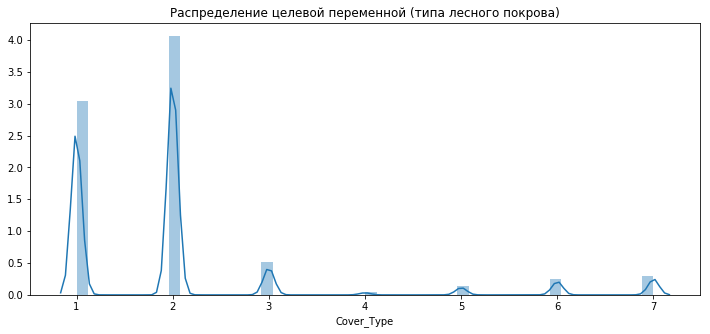

In [7]:
import seaborn as sns
plt.figure(figsize=(12,5))
plt.title("Распределение целевой переменной (типа лесного покрова)")
ax = sns.distplot(data["Cover_Type"])

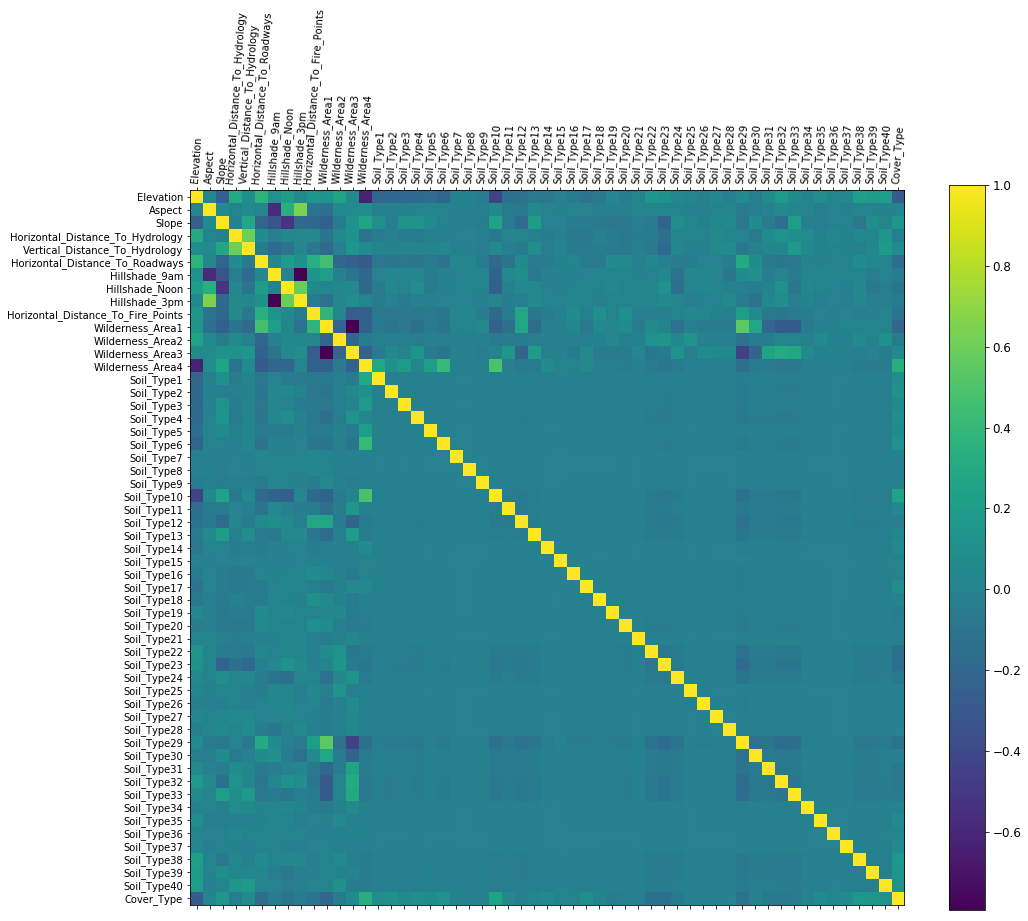

In [8]:
f = plt.figure(figsize=(16, 13))
corr = data.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=86)
plt.yticks(range(data.shape[1]), data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

In [9]:
corr.Cover_Type.map(lambda x : x).abs().sort_values(ascending = True)

Soil_Type26                           0.000375
Soil_Type7                            0.000496
Soil_Type28                           0.001702
Soil_Type8                            0.003667
Soil_Type34                           0.004643
Soil_Type9                            0.006110
Soil_Type15                           0.006425
Soil_Type25                           0.006449
Soil_Type18                           0.007390
Soil_Type16                           0.009844
Soil_Type30                           0.010436
Soil_Type27                           0.014407
Aspect                                0.017080
Horizontal_Distance_To_Hydrology      0.020317
Soil_Type12                           0.023601
Soil_Type13                           0.024404
Soil_Type36                           0.025397
Soil_Type21                           0.025400
Soil_Type20                           0.028665
Soil_Type11                           0.035379
Hillshade_9am                         0.035415
Soil_Type19  

Из результатов выше видно, что несколько признаков Soil_Type не имеют какой-либо корреляции с целевой переменной Cover_Type, поэтому мы можем попробовать удалить их из имеющихся у нас данных. С другой стороны, когда есть слабая корреляция, признак в сочетании с другим признаком может оказать большее влияние на результат.

### Data split + normalization

In [10]:
#Select predictors
X = data[data.columns[:54]]
#Target variable 
y = data.Cover_Type

from sklearn.model_selection import train_test_split

#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state =  92)
print(X_train.shape, X_test.shape)

(406708, 54) (174304, 54)


In [11]:
from sklearn import preprocessing

#По описанию первые 10 признаков являются численными, поэтому они нуждаются в нормализации 
train_norm = X_train[X_train.columns[0:10]]
test_norm = X_test[X_test.columns[0:10]]

std_scale = preprocessing.StandardScaler().fit(train_norm)
X_train_norm = std_scale.transform(train_norm)

training_norm_col = pd.DataFrame(X_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())

# Нормализуем тестовые данные используя mean и stdev тренировочных данных
X_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(X_test_norm, index=test_norm.index, columns=test_norm.columns) 
X_test.update(testing_norm_col)
print (X_test.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
308633  -1.994377  1.708702 -0.814930  ...            0            0            0
271042  -0.524826  1.655111  0.387379  ...            0            0            0
168722   0.608624 -0.827956 -1.082109  ...            0            0            0
245837  -0.127940 -1.086981  0.387379  ...            0            0            0
571149  -1.443743  0.440373  0.120199  ...            0            0            0

[5 rows x 54 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
443669   0.444149  0.833377  0.654558  ...            0            0            0
121896  -1.304296 -1.212027 -1.215699  ...            0            0            0
271268  -3.102798  1.405018  1.322507  ...            0            0            0
477178   0.633653  1.360358 -0.814930  ...            0            0            0
401094   0.365486 -0.970866 -0.681340  ...            0            0            0

[5 rows x 54 columns]


In [12]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,-6.673224e-16,2.088486e-17,2.882435e-17,-1.393219e-15,-1.888398e-16,1.130281e-16,-1.578889e-16,-1.308835e-15,-2.578211e-16,7.799252e-18,0.449615,0.051292,0.435858,0.063235,0.005183,0.012791,0.008237,0.021418,0.002695,0.011219,0.000157,0.000305,0.001967,0.056230,0.021448,0.051799,0.030098,0.001065,0.000005,0.004890,0.005876,0.003334,0.006808,0.015800,0.001438,0.057624,0.099892,0.036692,0.000831,0.004406,0.001898,0.001576,0.198265,0.052030,0.044140,0.090011,0.077289,0.002825,0.003393,0.000209,0.000467,0.026813,0.023752,0.015124
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.497455,0.220594,0.495869,0.243385,0.071807,0.112370,0.090383,0.144774,0.051842,0.105326,0.012543,0.017458,0.044307,0.230365,0.144872,0.221621,0.170857,0.032612,0.002218,0.069761,0.076433,0.057645,0.082231,0.124701,0.037899,0.233031,0.299857,0.188005,0.028816,0.066232,0.043527,0.039668,0.398693,0.222088,0.205406,0.286197,0.267050,0.053077,0.058151,0.014455,0.021609,0.161536,0.152275,0.122046
min,-3.935902e+00,-1.390665e+00,-1.883648e+00,-1.266987e+00,-3.642193e+00,-1.508164e+00,-7.925712e+00,-1.130290e+01,-3.728893e+00,-1.495818e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.391280e-01,-8.726152e-01,-6.813400e-01,-7.597212e-01,-6.767780e-01,-7.991350e-01,-5.272127e-01,-5.230132e-01,-6.169824e-01,-7.231092e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.295001e-01,-2.563145e-01,-1.469807e-01,-2.430617e-01,-2.825321e-01,-2.272957e-01,2.201104e-01,1.349141e-01,1.062981e-02,-2.047002e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [0]:
%%time
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [0]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('kNN с разным количеством соседей')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Accuracy')
#plt.show()

## Catboost baseline solution

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostClassifier

X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train , test_size = 0.25, random_state =  192)


catboost_model = CatBoostClassifier(
   bagging_temperature=1,
   random_strength=1,
   thread_count=3,
   iterations=500,
   l2_leaf_reg = 4.0, 
   learning_rate = 0.07521709965938336,
   random_seed=92,
   od_type='Iter',
   od_wait=20,
   custom_loss=['Accuracy'],
   use_best_model=True
)

In [0]:
catboost_model.fit(
   X_train_, y_train_,
   eval_set=(X_val, y_val),
   plot=True
)

In [0]:
print('Resulting tree count:', catboost_model.tree_count_)